In [1]:
%autosave 5

Autosaving every 5 seconds


# Installing necessary libraries for RAPIDs CuGraph

In [2]:
!pip3 install cudf-cu11 --extra-index-url=https://pypi.nvidia.com
!pip3 install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
!pip3 install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com


# Importing Required Libraries

In [3]:
import networkx as nx # library to deal with Graph Algorithms
import random # library for Pseudo Random Number Generator
import matplotlib.pyplot as plt # library to plot the graphs
import cugraph as cnx # library with GPU accelerated Graph Algorithms

# Defining the Constants

In [4]:
N = 100000 # Total number of nodes in the final graph
M = 100 # Size of the initial graph and the number of nodes to be introduced in each time interval
SEED = 1682524416 # Seed to generate the Random choices 

# Creating the Graphs

## Defining the required algorithms

In [5]:
# randomly chose m sized subset of seq
def _random_subset(seq,m):
    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x)
    return targets

# the Barabasi Albert Model Algorithm
def barabasi_albert_graph(n, m, seed=None, initial_graph=None):
    if m < 1 or  m >= n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1 and m < n, m = %d, n = %d" % (m, n))

    if seed is not None:
        random.seed(seed)

    if initial_graph is not None:
        G = initial_graph.copy()
    else:
        G = nx.empty_graph(m)

    targets = list(range(m))
    repeated_nodes = []
    
    source = m
    while source < n:
        G.add_edges_from(zip([source] * m, targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * m)
        targets = _random_subset(repeated_nodes, m)
        source += 1

    return G

## Creating the initial Graph

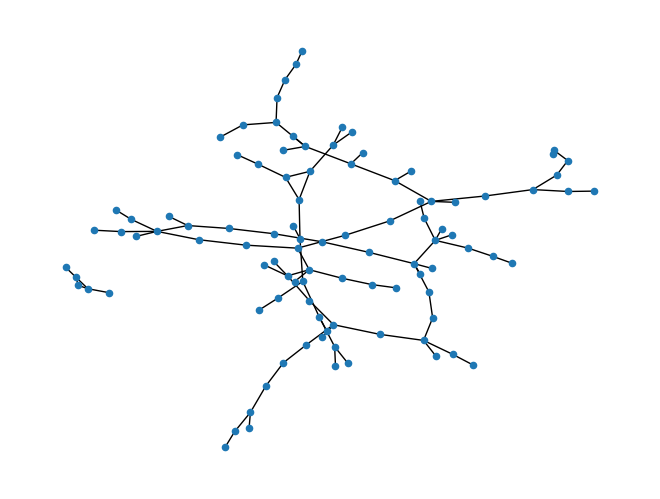

In [7]:
# initial graph
g = nx.empty_graph(M)

for i in range(0, M):
    t = random.randrange(M)
    if i == t: # avoid self-loops
        t = random.randrange(M)
    g.add_edge(i, t)

nx.draw(g, node_size=20)

## Creating the BA graph

In [8]:
# create a BA graph
G = barabasi_albert_graph(N, M, seed=SEED, initial_graph=g)

## Degree Distribution Plot

### Plotting the Degree Distribution in log-log scales

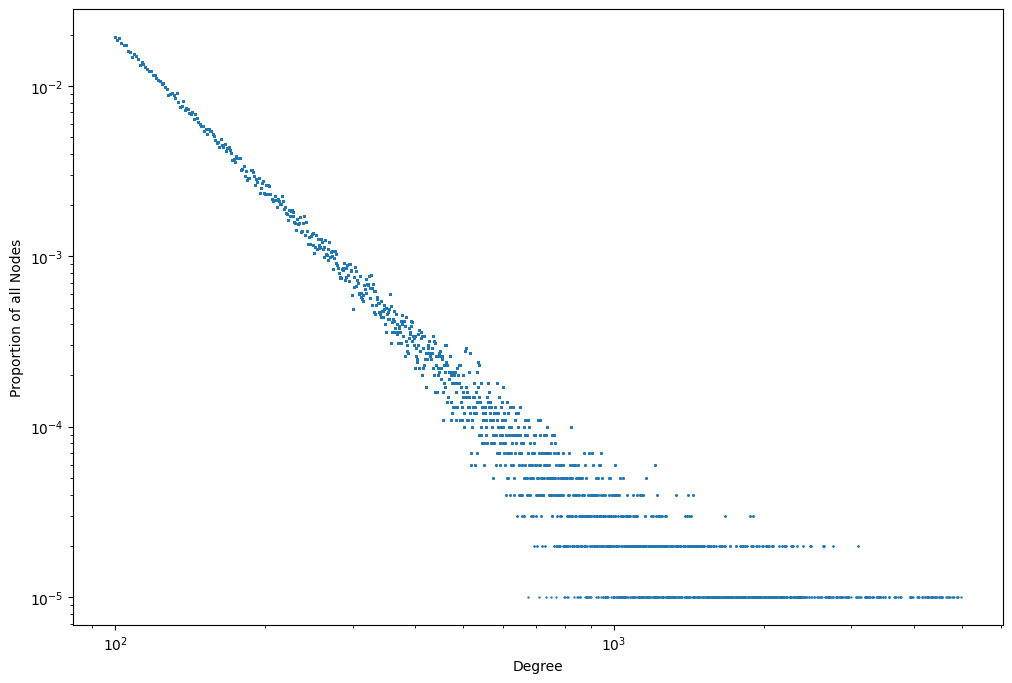

In [9]:
# degrees distribution plotted in log-log scale
d = dict(G.degree())
ns = nx.number_of_nodes(G)
degree = sorted(list(d.values()), reverse=False)
proportion = [degree.count(v) / ns for v in degree]
plt.figure(figsize=(12, 8))
plt.scatter(degree, proportion, s=0.5)
plt.xlabel('Degree')
plt.ylabel("Proportion of all Nodes")
plt.xscale('log')
plt.yscale('log')
plt.show()

### Degree Distribution Plot in Normal scales

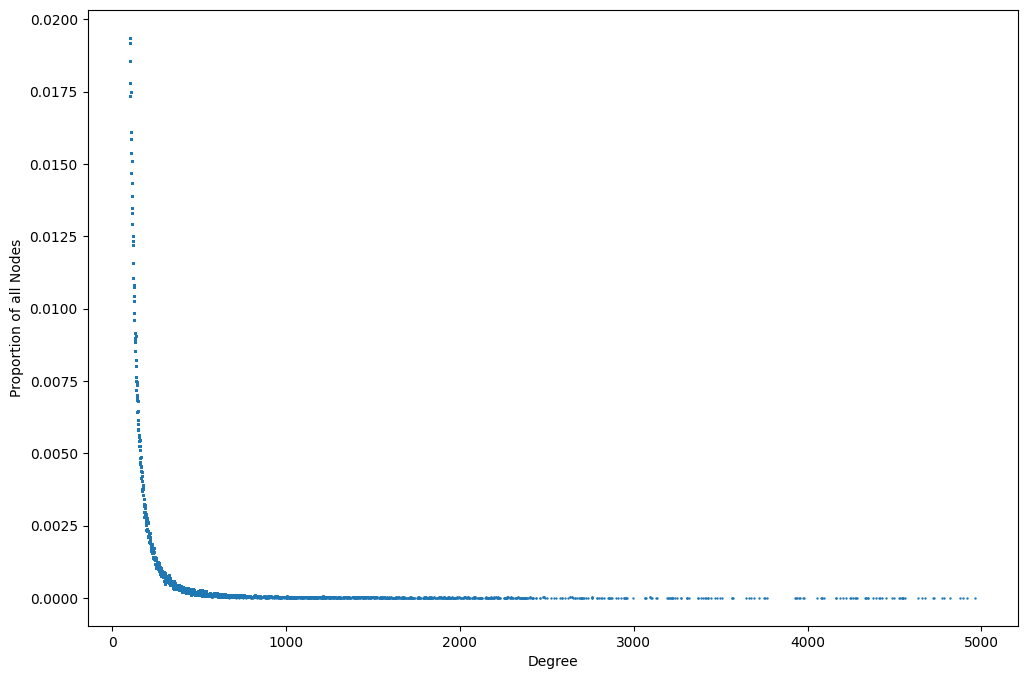

In [23]:
ns = nx.number_of_nodes(G)
degree = sorted(list(d.values()), reverse=False)
plt.figure(figsize=(12, 8))
plt.scatter(degree, proportion, s=0.5)
plt.xlabel('Degree')
plt.ylabel("Proportion of all Nodes")
plt.show()

### Finding the node with Maximum degree

In [10]:
max_deg_node = max(d, key=d.get) # find the node with highest degree
print('Node with highest degree:', max_deg_node, "with degree:", d[max_deg_node])
# finding the time when it was introduced in the graph
print('Time Interval when node', max_deg_node, 'was:', int((max_deg_node - M) / M))

Node with highest degree: 103 with degree: 4965
Time Interval when node 103 was: 3


## Plotting the degree of a node and the time when the node with that degree appeared in the graph

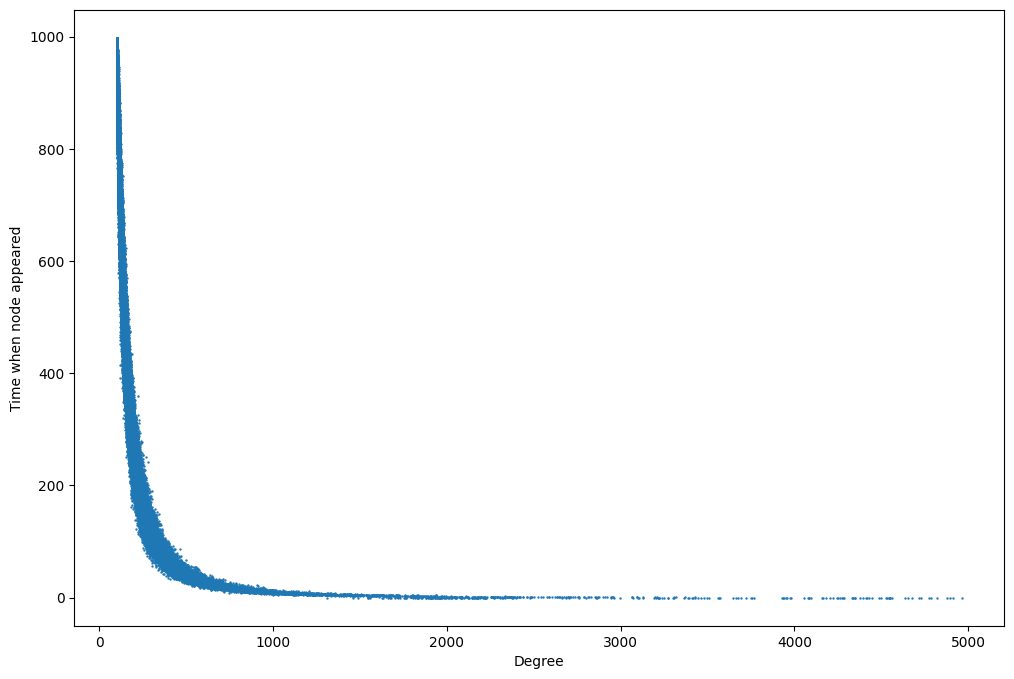

In [21]:
d = dict(G.degree())
plt.figure(figsize=(12, 8))
plt.scatter(list(d.values()), [max(0, x - M) for x in list(d.keys())], s=0.5)
plt.xlabel('Degree')
plt.ylabel("Time when node appeared")
plt.show()

# Plots of different measures of Centrality

## Degree Centrality

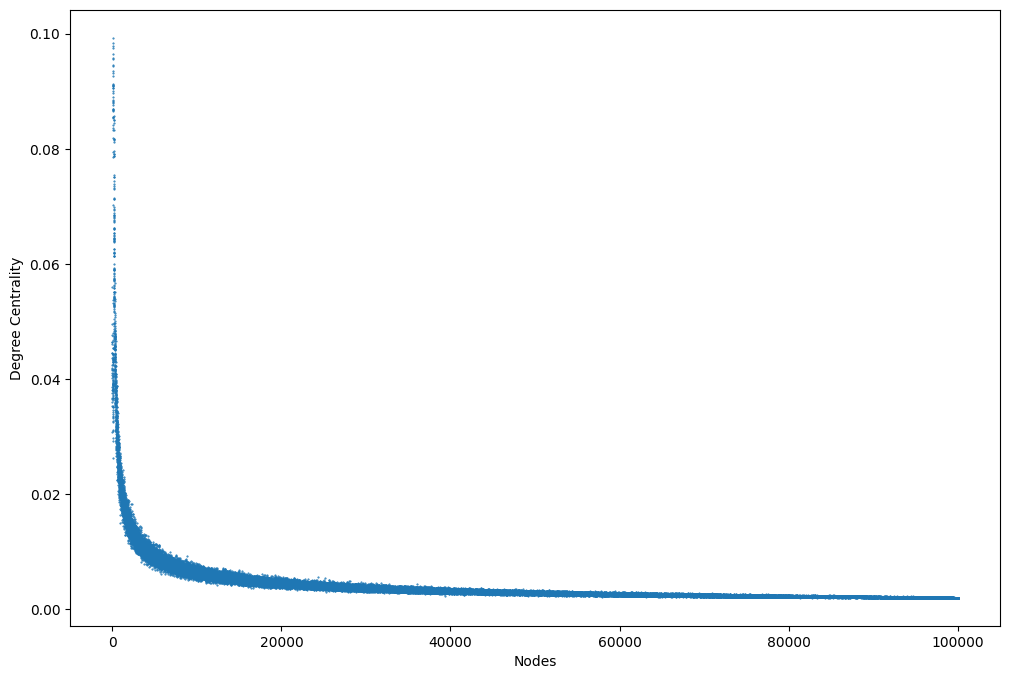

In [11]:
deg_centrality = cnx.degree_centrality(G) # calculate Degree Centrality

plt.figure(figsize=(12, 8))
plt.plot(list(deg_centrality.keys()), list(deg_centrality.values()), '-o', linewidth=0, markersize=0.5)
plt.xlabel('Nodes')
plt.ylabel("Degree Centrality")
plt.show()

## Eigenvector Centrality

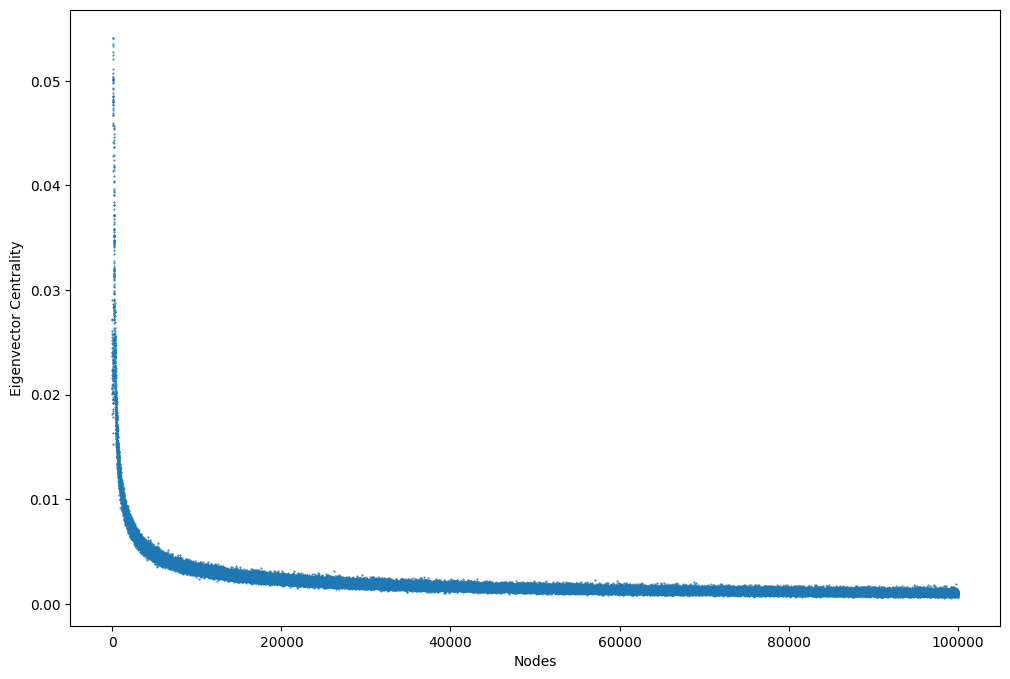

In [12]:
eigenvector_centrality = cnx.eigenvector_centrality(G) # Calculate Eigenvector centrality

plt.figure(figsize=(12, 8))
plt.plot(list(eigenvector_centrality.keys()), list(eigenvector_centrality.values()), '-o', linewidth=0, markersize=0.5)
plt.xlabel('Nodes')
plt.ylabel("Eigenvector Centrality")
plt.show()

## Katz Centrality

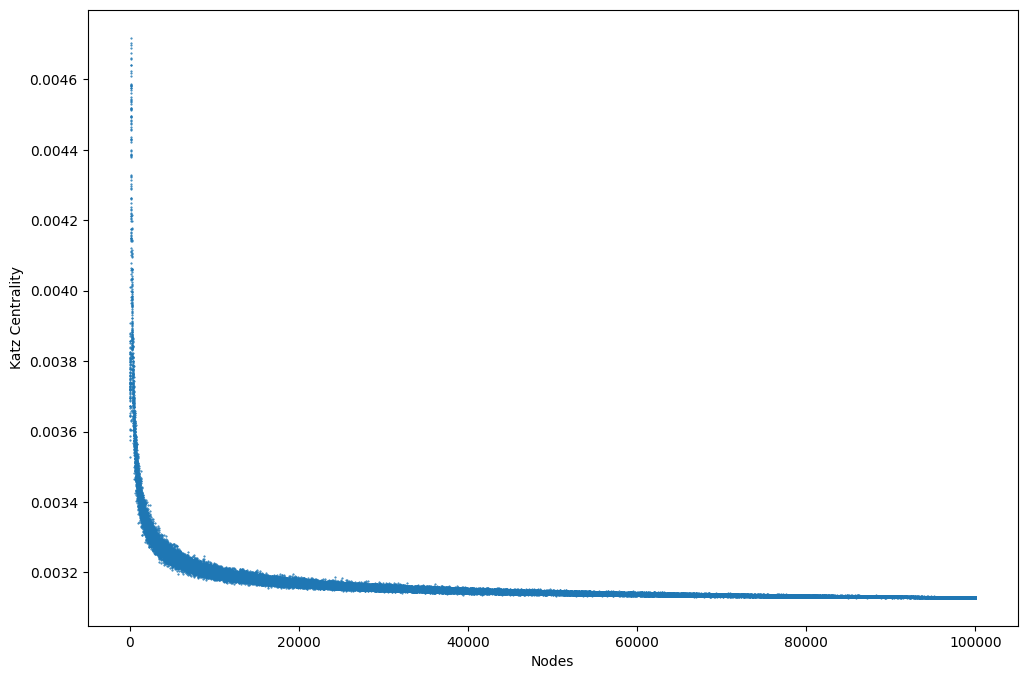

In [13]:
katz_centrality = cnx.katz_centrality(G) # Calculate Katz Centrality

plt.figure(figsize=(12, 8))
plt.plot(list(katz_centrality.keys()), list(katz_centrality.values()), '-o', linewidth=0, markersize=0.5)
plt.xlabel('Nodes')
plt.ylabel("Katz Centrality")
plt.show()

## Pagerank

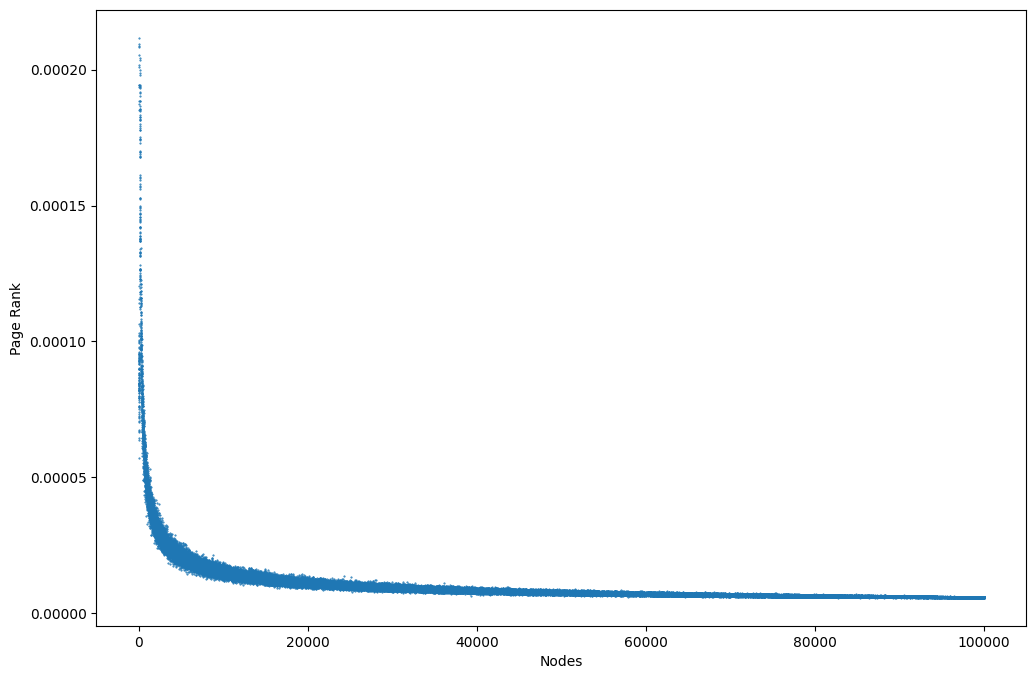

In [14]:
pagerank = nx.pagerank(G) # calculate the Pagerank

plt.figure(figsize=(12, 8))
plt.plot(list(pagerank.keys()), list(pagerank.values()), '-o', linewidth=0, markersize=0.5)
plt.xlabel('Nodes')
plt.ylabel("Page Rank")
plt.show()

## Closeness Centrality

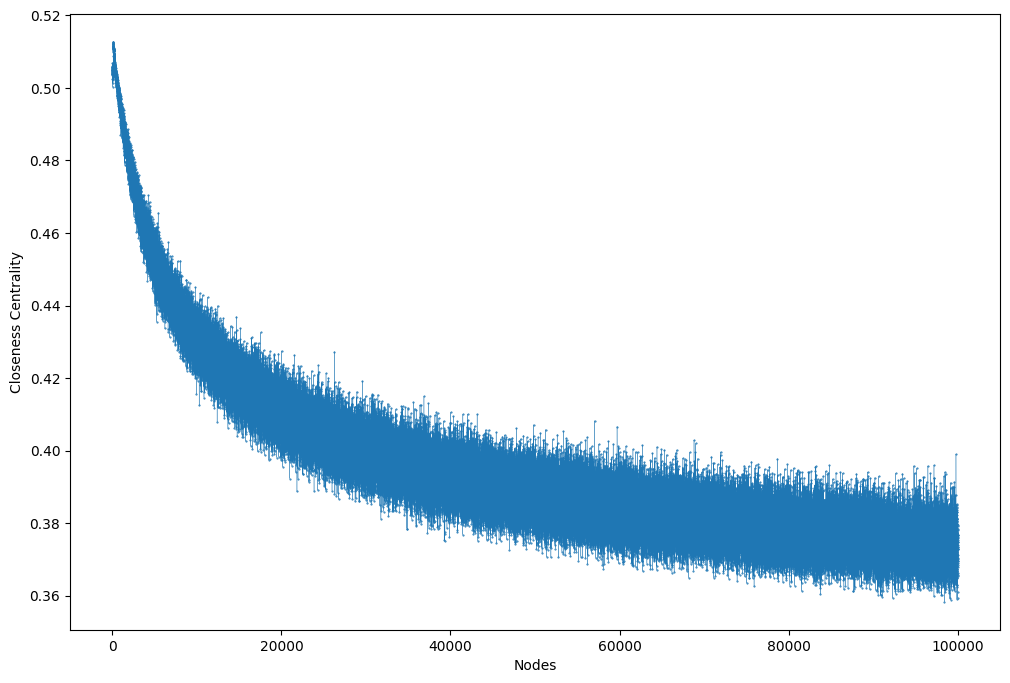

In [ ]:
closeness_centrality = nx.closeness_centrality(G) # Calculating the closeness Centrality

plt.figure(figsize=(12, 8))
plt.plot(list(closeness_centrality.keys()), list(closeness_centrality.values()), '-o', linewidth=0, markersize=0.5)
plt.xlabel('Nodes')
plt.ylabel("Closeness Centrality")
plt.show()

## Betweenness Centrality

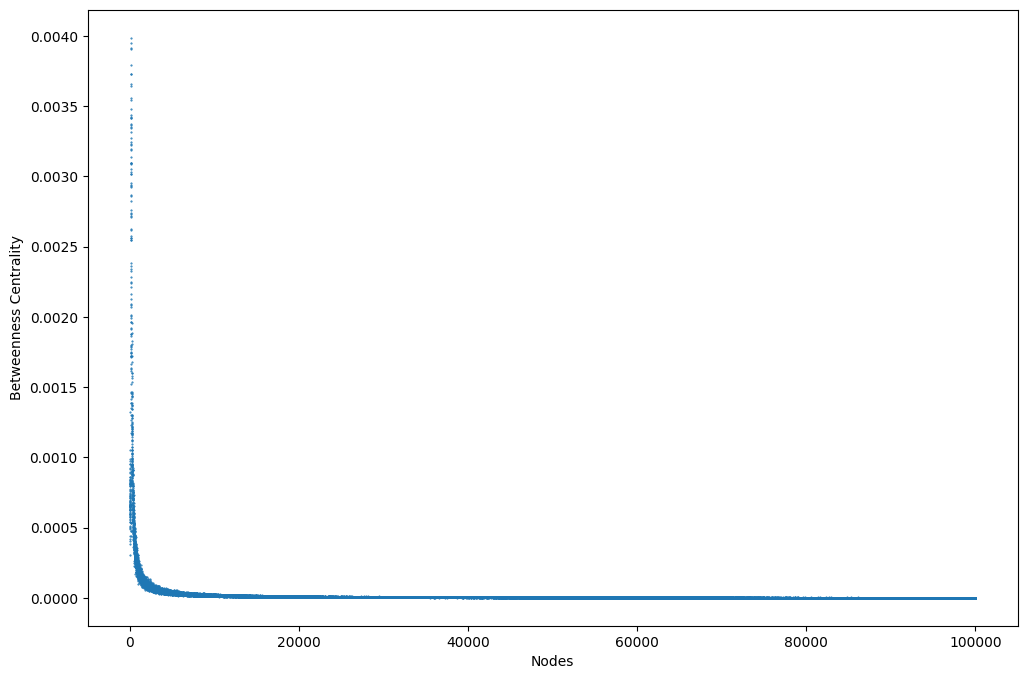

In [17]:
betweenness_centrality = cnx.betweenness_centrality(G) # Calculate the Betweenness Centrality

plt.figure(figsize=(12, 8))
plt.plot(list(betweenness_centrality.keys()), list(betweenness_centrality.values()), '-o', linewidth=0, markersize=0.5)
plt.xlabel('Nodes')
plt.ylabel("Betweenness Centrality")
plt.show()

# Giant Component

## Finding the Giant component and find the ratio of both's size

In [15]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True) 
S = G.subgraph(Gcc[0]) # find the largest connected component

ratio = (len(S.nodes())) / (len(G.nodes())) # calculate its ratio
print("The ratio of size of Giant component to Graph is:", ratio)

The ratio of size of Giant component to Graph is: 1.0


# Independent Cascade Model

## Finding the average number of steps required to spread the information to maximum nodes

In [16]:
# Independent Cascade algorithm
def independent_cascade(G, src, p):
  steps = 0
  activated = set({src})
  cur = [src]

  while len(cur) != 0:
    steps += 1
    new_cur = []
    
    for n in cur:
      not_active_neighbor = [x for x in G[n] if x not in activated]

      for neighbor in not_active_neighbor:
        rand_int = random.random()
        if rand_int <= p:
          activated.add(neighbor)
          new_cur.append(neighbor)

    cur = new_cur

  return steps

for p in [0.25, 0.5, 0.75, 1]:  # probability of spread of information
  avg = 0
  for z in range(30):
    src = random.randrange(N) # selecting a random node
    avg += independent_cascade(G, src, p)

  print("Average of", z + 1, "number of steps required to spread the information to maximum nodes using the probability:", p, "is:", avg / (z + 1))

Average of 30 number of steps required to spread the information to maximum nodes using the probability: 0.25 is: 5.0
Average of 30 number of steps required to spread the information to maximum nodes using the probability: 0.5 is: 4.233333333333333
Average of 30 number of steps required to spread the information to maximum nodes using the probability: 0.75 is: 4.0
Average of 30 number of steps required to spread the information to maximum nodes using the probability: 1 is: 4.0
